# Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией)

## 2. Создание бейзлайна и оценка качества

Перейдем к созданию базовых моделей

### Классификация

Загрузим датасет и посмотрим на данные

In [1]:
import pandas as pd

df_class = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

print(f"Размерность данных")
print(df_class.shape)
print(f"\nИнформация о данных")
print(df_class.info())
print(f"\nПервые 5 строк")
print(df_class.head())
print(f"\nРаспределение классов")
print(df_class['class'].value_counts())

Размерность данных
(10000, 18)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)

Выделим исходные признаки, которые непосредственно описывают физические свойства объектов и целевую переменную. А также закодируем таргет, так как это категориальный признак.

In [2]:
from sklearn.preprocessing import LabelEncoder

X_class = df_class[['u', 'g', 'r', 'i', 'z', 'redshift']]
y_class = df_class['class']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

Разделим данные на выборку для обучения и тестовую выборку.

In [3]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42
)

Обучим базовую модель логистической регрессии и выполним предсказания на тестовой выборке.

In [4]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_class, y_train_class)

y_pred_class = lr_classifier.predict(X_test_class)

Опишем функцию, которая будет использоваться для оценки обученной модели классификации.

1. Accuracy: 0.9575

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.977059 0.940763  0.958568
   QSO   0.967391 0.936842  0.951872
  STAR   0.933489 0.982801  0.957510

3. Macro F1: 0.9560

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     937    2    57
QSO         12  178     0
STAR        10    4   800


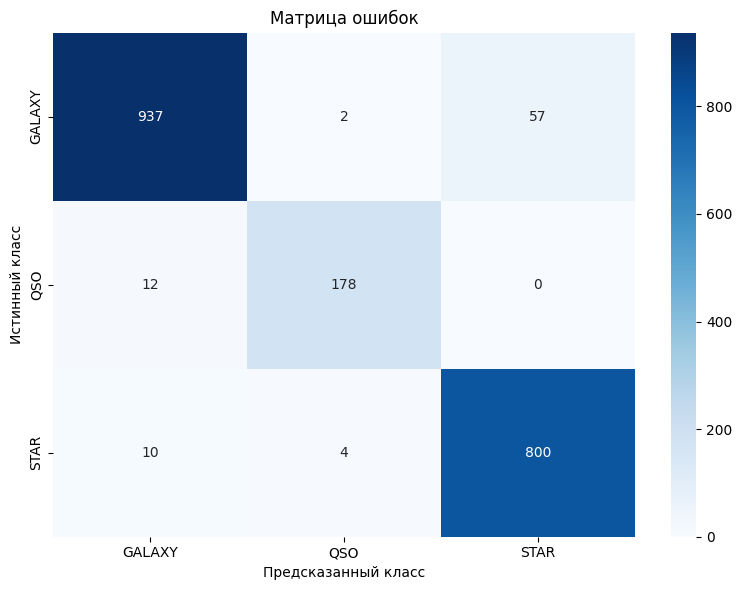

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

def evaluate_classification_model(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")
    
    print(f"\n2. Метрики по классам:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    metrics_df = pd.DataFrame({
        'Класс': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(metrics_df.to_string(index=False))
    
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n3. Macro F1: {macro_f1:.4f}")
    
    print(f"\n4. Матрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_f1': macro_f1,
        'confusion_matrix': cm
    }

class_metrics = evaluate_classification_model(y_test_class, y_pred_class, class_names)

### Регрессия

Загрузим датасет и посмотрим на данные

In [6]:
df_reg = pd.read_csv('data/abalone.csv')

print(f"Размерность данных")
print(df_reg.shape)
print(f"\nИнформация о данных")
print(df_reg.info())
print(f"\nПервые 5 строк")
print(df_reg.head())
print(f"\nСтатистика по числовым признакам")
print(df_reg.describe())

Размерность данных
(4177, 9)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Первые 5 строк
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.4

Выделим признаки и целевую переменную. Закодируем категориальный признак Sex.

In [7]:
X_reg = df_reg.drop('Rings', axis=1)
y_reg = df_reg['Rings']

le_sex = LabelEncoder()
X_reg_encoded = X_reg.copy()
X_reg_encoded['Sex'] = le_sex.fit_transform(X_reg['Sex'])

Разделим данные на выборку для обучения и тестовую выборку.

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

Обучим базовую модель линейной регрессии и выполним предсказания на тестовой выборке.

In [9]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()
lr_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = lr_regressor.predict(X_test_reg)

Опишем функцию, которая будет использоваться для оценки обученной модели регрессии.

In [10]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
)

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"1. MAE: {mae:.4f}")

    mse = mean_squared_error(y_true, y_pred)
    print(f"\n2. MSE: {mse:.4f}")
    
    rmse = np.sqrt(mse)
    print(f"\n3. RMSE: {rmse:.4f}")
    
    r2 = r2_score(y_true, y_pred)
    print(f"\n4. R²: {r2:.4f}")
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

reg_metrics = evaluate_regression_model(y_test_reg, y_pred_reg)

1. MAE: 1.6306

2. MSE: 5.0625

3. RMSE: 2.2500

4. R²: 0.5323


## 3. Улучшение бейзлайна

Перейдем к формулированию и проверкам гипотез

### Классификация

**Гипотеза 1:** Добавление стандартизации признаков и стратификации при разбиении на выборки улучшит качество модели.

Результаты гипотезы 1:
1. Accuracy: 0.9695

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.983539 0.956000  0.969574
   QSO   0.981595 0.941176  0.960961
  STAR   0.951445 0.991566  0.971091

3. Macro F1: 0.9672

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     956    2    42
QSO         10  160     0
STAR         6    1   823


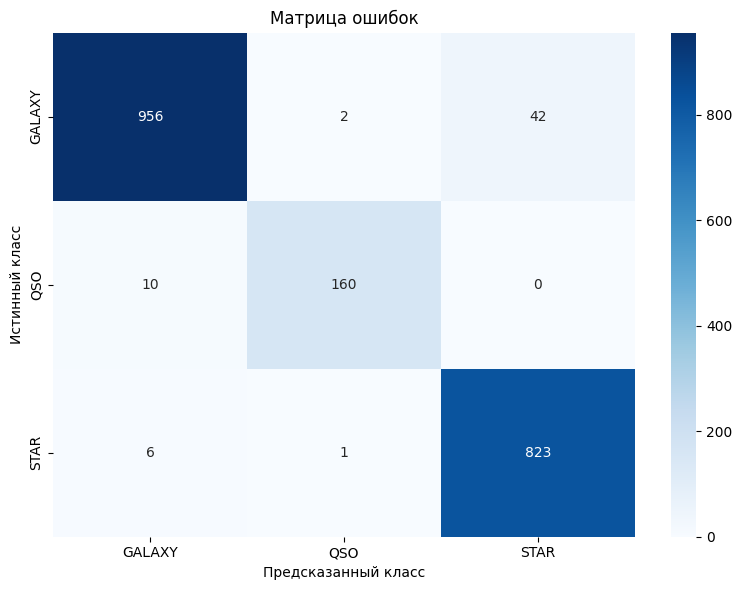

In [11]:
from sklearn.preprocessing import StandardScaler

X_train_class_h1, X_test_class_h1, y_train_class_h1, y_test_class_h1 = train_test_split(
    X_class, y_class_encoded, test_size=0.2, stratify=y_class_encoded, random_state=42
)

scaler_class_h1 = StandardScaler()
X_train_class_h1_scaled = scaler_class_h1.fit_transform(X_train_class_h1)
X_test_class_h1_scaled = scaler_class_h1.transform(X_test_class_h1)

lr_classifier_h1 = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier_h1.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_h1 = lr_classifier_h1.predict(X_test_class_h1_scaled)

print("Результаты гипотезы 1:")
class_metrics_h1 = evaluate_classification_model(y_test_class_h1, y_pred_class_h1, class_names)

**Гипотеза 2:** Подбор оптимальных гиперпараметров на кросс-валидации улучшит качество модели.

/home/zendroix/labs/AI_Frameworks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/zendroix/labs/AI_Frameworks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/zendroix/labs/AI_Frameworks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An e

Лучшие параметры:
  C: 100
  penalty: l2
  solver: lbfgs

Лучший F1-score (кросс-валидация): 0.9804

Результаты гипотезы 2:
1. Accuracy: 0.9890

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.991952 0.986000  0.988967
   QSO   1.000000 0.952941  0.975904
  STAR   0.983412 1.000000  0.991637

3. Macro F1: 0.9855

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     986    0    14
QSO          8  162     0
STAR         0    0   830


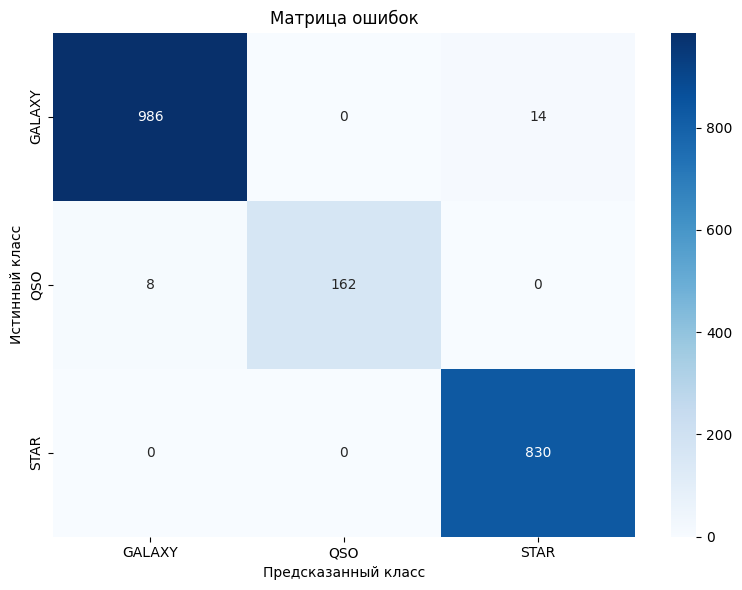

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid_h2 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2']
}

lr_for_tuning = LogisticRegression(random_state=42, max_iter=1000)
grid_search_h2 = GridSearchCV(
    lr_for_tuning, 
    param_grid_h2, 
    cv=5, 
    scoring='f1_macro',
    n_jobs=-1
)
grid_search_h2.fit(X_train_class_h1_scaled, y_train_class_h1)

print("Лучшие параметры:")
for param, value in grid_search_h2.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучший F1-score (кросс-валидация): {grid_search_h2.best_score_:.4f}")

lr_classifier_h2 = LogisticRegression(
    C=grid_search_h2.best_params_['C'],
    solver=grid_search_h2.best_params_['solver'],
    penalty=grid_search_h2.best_params_['penalty'],
    random_state=42,
    max_iter=1000
)
lr_classifier_h2.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_h2 = lr_classifier_h2.predict(X_test_class_h1_scaled)

print("\nРезультаты гипотезы 2:")
class_metrics_h2 = evaluate_classification_model(y_test_class_h1, y_pred_class_h2, class_names)

**Гипотеза 3:** Добавление полиномиальных признаков улучшит качество модели.

Результаты гипотезы 3:
1. Accuracy: 0.9890

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.991952 0.986000  0.988967
   QSO   0.993865 0.952941  0.972973
  STAR   0.984579 1.000000  0.992230

3. Macro F1: 0.9847

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     986    1    13
QSO          8  162     0
STAR         0    0   830


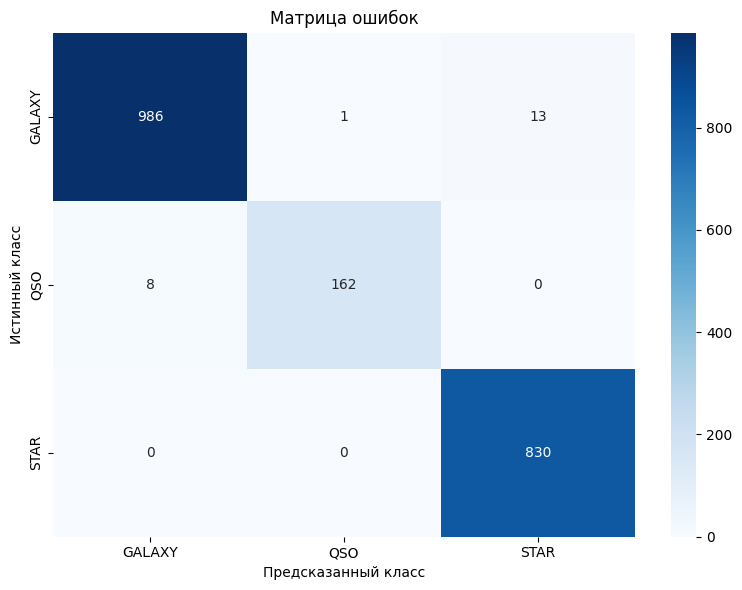

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_class_h3_poly = poly.fit_transform(X_train_class_h1_scaled)
X_test_class_h3_poly = poly.transform(X_test_class_h1_scaled)

lr_classifier_h3 = LogisticRegression(
    C=grid_search_h2.best_params_['C'],
    solver=grid_search_h2.best_params_['solver'],
    penalty=grid_search_h2.best_params_['penalty'],
    random_state=42,
    max_iter=1000
)
lr_classifier_h3.fit(X_train_class_h3_poly, y_train_class_h1)
y_pred_class_h3 = lr_classifier_h3.predict(X_test_class_h3_poly)

print("Результаты гипотезы 3:")
class_metrics_h3 = evaluate_classification_model(y_test_class_h1, y_pred_class_h3, class_names)

Обучим финальную улучшенную модель

Результаты улучшенного бейзлайна для классификации:
1. Accuracy: 0.9890

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.991952 0.986000  0.988967
   QSO   1.000000 0.952941  0.975904
  STAR   0.983412 1.000000  0.991637

3. Macro F1: 0.9855

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     986    0    14
QSO          8  162     0
STAR         0    0   830


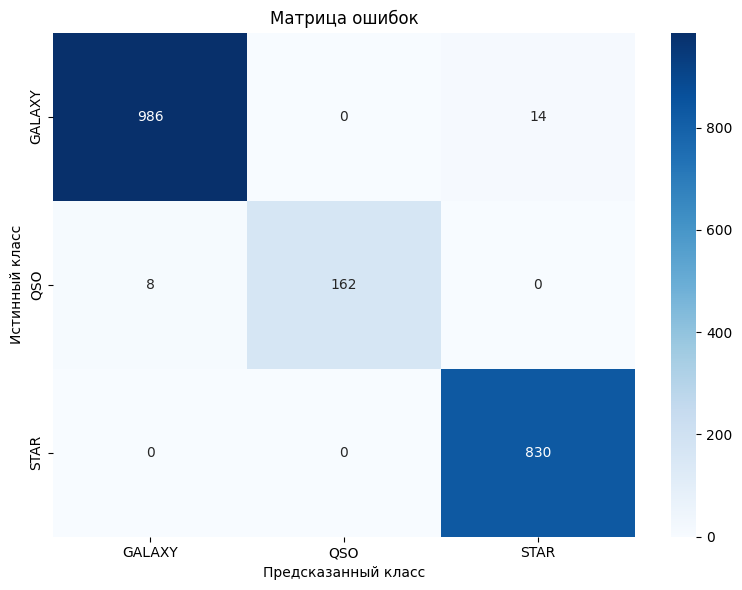

In [14]:
lr_classifier_improved = LogisticRegression(
    C=grid_search_h2.best_params_['C'],
    solver=grid_search_h2.best_params_['solver'],
    penalty=grid_search_h2.best_params_['penalty'],
    random_state=42,
    max_iter=1000
)
lr_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_class_improved = lr_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты улучшенного бейзлайна для классификации:")
class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_class_improved, class_names)

Сравним результаты улучшенного бейзлайна с базовым бейзлайном

In [15]:
comparison_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'Accuracy': [class_metrics['accuracy'], class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], class_metrics_improved['macro_f1']]
})

print("Сравнение базового и улучшенного бейзлайна для классификации:")
print(comparison_class.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для классификации:
             Модель  Accuracy  Macro F1
   Базовый бейзлайн    0.9575  0.955983
Улучшенный бейзлайн    0.9890  0.985502


### Регрессия

**Гипотеза 1:** Добавление стандартизации признаков улучшит качество модели.

In [16]:
scaler_reg_h1 = StandardScaler()
X_train_reg_h1_scaled = scaler_reg_h1.fit_transform(X_train_reg)
X_test_reg_h1_scaled = scaler_reg_h1.transform(X_test_reg)

lr_regressor_h1 = LinearRegression()
lr_regressor_h1.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_h1 = lr_regressor_h1.predict(X_test_reg_h1_scaled)

print("Результаты гипотезы 1:")
reg_metrics_h1 = evaluate_regression_model(y_test_reg, y_pred_reg_h1)

Результаты гипотезы 1:
1. MAE: 1.6306

2. MSE: 5.0625

3. RMSE: 2.2500

4. R²: 0.5323


**Гипотеза 2:** Использование Ridge регрессии с подбором параметра регуляризации улучшит качество модели.

In [17]:
from sklearn.linear_model import Ridge

param_grid_reg_h2 = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000]
}

ridge_for_tuning = Ridge(random_state=42)
grid_search_reg_h2 = GridSearchCV(
    ridge_for_tuning,
    param_grid_reg_h2,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_reg_h2.fit(X_train_reg_h1_scaled, y_train_reg)

print("Лучшие параметры:")
for param, value in grid_search_reg_h2.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучший MSE (кросс-валидация): {-grid_search_reg_h2.best_score_:.4f}")

ridge_regressor_h2 = Ridge(
    alpha=grid_search_reg_h2.best_params_['alpha'],
    random_state=42
)
ridge_regressor_h2.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_h2 = ridge_regressor_h2.predict(X_test_reg_h1_scaled)

print("\nРезультаты гипотезы 2:")
reg_metrics_h2 = evaluate_regression_model(y_test_reg, y_pred_reg_h2)

Лучшие параметры:
  alpha: 0.1

Лучший MSE (кросс-валидация): 4.9880

Результаты гипотезы 2:
1. MAE: 1.6306

2. MSE: 5.0625

3. RMSE: 2.2500

4. R²: 0.5323


**Гипотеза 3:** Добавление полиномиальных признаков улучшит качество модели.

In [18]:
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_train_reg_h3_poly = poly_reg.fit_transform(X_train_reg_h1_scaled)
X_test_reg_h3_poly = poly_reg.transform(X_test_reg_h1_scaled)

ridge_regressor_h3 = Ridge(
    alpha=grid_search_reg_h2.best_params_['alpha'],
    random_state=42
)
ridge_regressor_h3.fit(X_train_reg_h3_poly, y_train_reg)
y_pred_reg_h3 = ridge_regressor_h3.predict(X_test_reg_h3_poly)

print("Результаты гипотезы 3:")
reg_metrics_h3 = evaluate_regression_model(y_test_reg, y_pred_reg_h3)

Результаты гипотезы 3:
1. MAE: 1.5493

2. MSE: 4.8623

3. RMSE: 2.2051

4. R²: 0.5508


Обучим финальную улучшенную модель

In [19]:
ridge_regressor_improved = Ridge(
    alpha=grid_search_reg_h2.best_params_['alpha'],
    random_state=42
)
ridge_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg)
y_pred_reg_improved = ridge_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты улучшенного бейзлайна для регрессии:")
reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_reg_improved)

Результаты улучшенного бейзлайна для регрессии:
1. MAE: 1.6306

2. MSE: 5.0625

3. RMSE: 2.2500

4. R²: 0.5323


Сравним результаты улучшенного бейзлайна с базовым бейзлайном

In [20]:
comparison_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'MAE': [reg_metrics['mae'], reg_metrics_improved['mae']],
    'RMSE': [reg_metrics['rmse'], reg_metrics_improved['rmse']],
    'R²': [reg_metrics['r2'], reg_metrics_improved['r2']]
})

print("Сравнение базового и улучшенного бейзлайна для регрессии:")
print(comparison_reg.to_string(index=False))

Сравнение базового и улучшенного бейзлайна для регрессии:
             Модель      MAE     RMSE       R²
   Базовый бейзлайн 1.630561 2.250008 0.532338
Улучшенный бейзлайн 1.630633 2.250000 0.532342


## 4. Имплементация алгоритма машинного обучения

Перейдем к имлпементации алгоритмов

### Классификация

Реализуем алгоритм логистической регрессии для классификации

In [21]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, C=1.0, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.C = C
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.classes_ = None
        self.n_classes_ = None
        
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        
        n_samples, n_features = X.shape
        
        if self.n_classes_ == 2:
            y_binary = (y == self.classes_[1]).astype(float)
            self.weights = np.random.randn(n_features) * 0.01
            self.bias = 0.0
            
            for i in range(self.max_iter):
                z = np.dot(X, self.weights) + self.bias
                predictions = self._sigmoid(z)

                dw = (1 / n_samples) * np.dot(X.T, (predictions - y_binary)) + (1 / self.C) * self.weights
                db = (1 / n_samples) * np.sum(predictions - y_binary)
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
        else:
            self.weights = np.random.randn(self.n_classes_, n_features) * 0.01
            self.bias = np.zeros(self.n_classes_)
            
            for i in range(self.max_iter):
                z = np.dot(X, self.weights.T) + self.bias
                predictions = self._softmax(z)

                y_one_hot = np.zeros((n_samples, self.n_classes_))
                for idx, cls in enumerate(self.classes_):
                    y_one_hot[:, idx] = (y == cls).astype(float)

                error = predictions - y_one_hot
                dw = (1 / n_samples) * np.dot(error.T, X) + (1 / self.C) * self.weights
                db = (1 / n_samples) * np.sum(error, axis=0)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
        
        return self
    
    def predict_proba(self, X):
        X = np.array(X)
        
        if self.n_classes_ == 2:
            z = np.dot(X, self.weights) + self.bias
            proba = self._sigmoid(z)
            return np.column_stack([1 - proba, proba])
        else:
            z = np.dot(X, self.weights.T) + self.bias
            return self._softmax(z)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

Обучим имплементированную модель на исходных данных

Результаты имплементированной модели классификации:
1. Accuracy: 0.4980

2. Метрики по классам:
 Класс  Precision  Recall  F1-score
GALAXY      0.498     1.0  0.664887
   QSO      0.000     0.0  0.000000
  STAR      0.000     0.0  0.000000

3. Macro F1: 0.2216

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     996    0     0
QSO        190    0     0
STAR       814    0     0


/home/zendroix/labs/AI_Frameworks/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


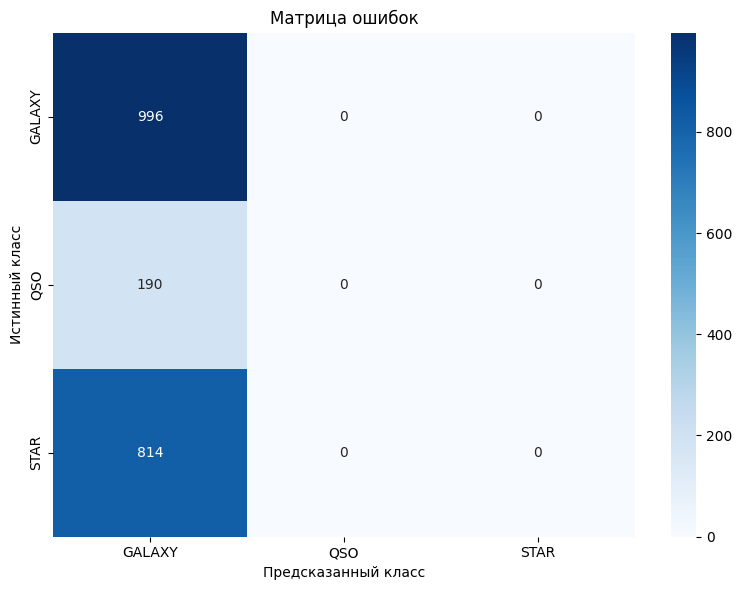

In [22]:
my_lr_classifier = MyLogisticRegression(learning_rate=0.01, max_iter=1000, C=1.0, random_state=42)
my_lr_classifier.fit(X_train_class.values, y_train_class)
y_pred_my_class = my_lr_classifier.predict(X_test_class.values)

print("Результаты имплементированной модели классификации:")
my_class_metrics = evaluate_classification_model(y_test_class, y_pred_my_class, class_names)

Сравним результаты имплементированной модели с базовым бейзлайном

In [23]:
comparison_my_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'Accuracy': [class_metrics['accuracy'], my_class_metrics['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], my_class_metrics['macro_f1']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_class.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель  Accuracy  Macro F1
Базовый бейзлайн (sklearn)    0.9575  0.955983
 Имплементированная модель    0.4980  0.221629


Теперь применим техники из улучшенного бейзлайна

Результаты имплементированной модели с улучшениями:
1. Accuracy: 0.7985

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.800587 0.819000  0.809689
   QSO   1.000000 0.823529  0.903226
  STAR   0.762246 0.768675  0.765447

3. Macro F1: 0.8261

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     819    0   181
QSO         12  140    18
STAR       192    0   638


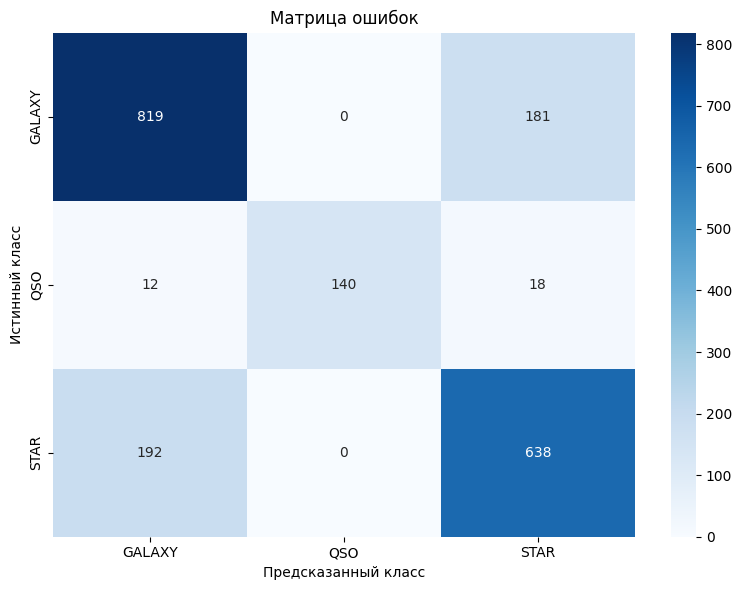

In [24]:
best_C = grid_search_h2.best_params_['C']

my_lr_classifier_improved = MyLogisticRegression(
    learning_rate=0.01,
    max_iter=1000,
    C=best_C,
    random_state=42
)
my_lr_classifier_improved.fit(X_train_class_h1_scaled, y_train_class_h1)
y_pred_my_class_improved = my_lr_classifier_improved.predict(X_test_class_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_class_metrics_improved = evaluate_classification_model(y_test_class_h1, y_pred_my_class_improved, class_names)

Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном

In [25]:
comparison_my_class_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'Accuracy': [class_metrics_improved['accuracy'], my_class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics_improved['macro_f1'], my_class_metrics_improved['macro_f1']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_class_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель  Accuracy  Macro F1
          Улучшенный бейзлайн (sklearn)    0.9890  0.985502
Имплементированная модель с улучшениями    0.7985  0.826120


### Регрессия

Реализуем алгоритм линейной регрессии

In [26]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, alpha=0.0, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.alpha = alpha
        self.random_state = random_state
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape

        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
        
        for i in range(self.max_iter):
            predictions = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + (self.alpha / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

Обучим имплементированную модель на исходных данных

In [27]:
my_lr_regressor = MyLinearRegression(learning_rate=0.01, max_iter=1000, alpha=0.0, random_state=42)
my_lr_regressor.fit(X_train_reg.values, y_train_reg.values)
y_pred_my_reg = my_lr_regressor.predict(X_test_reg.values)

print("Результаты имплементированной модели регрессии:")
my_reg_metrics = evaluate_regression_model(y_test_reg, y_pred_my_reg)

Результаты имплементированной модели регрессии:
1. MAE: 1.9437

2. MSE: 7.2421

3. RMSE: 2.6911

4. R²: 0.3310


Сравним результаты имплементированной модели с базовым бейзлайном

In [28]:
comparison_my_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'MAE': [reg_metrics['mae'], my_reg_metrics['mae']],
    'RMSE': [reg_metrics['rmse'], my_reg_metrics['rmse']],
    'R²': [reg_metrics['r2'], my_reg_metrics['r2']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_reg.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель      MAE     RMSE       R²
Базовый бейзлайн (sklearn) 1.630561 2.250008 0.532338
 Имплементированная модель 1.943738 2.691109 0.331000


Теперь применим техники из улучшенного бейзлайна

In [29]:
best_alpha = grid_search_reg_h2.best_params_['alpha']

my_lr_regressor_improved = MyLinearRegression(
    learning_rate=0.01,
    max_iter=1000,
    alpha=best_alpha,
    random_state=42
)
my_lr_regressor_improved.fit(X_train_reg_h1_scaled, y_train_reg.values)
y_pred_my_reg_improved = my_lr_regressor_improved.predict(X_test_reg_h1_scaled)

print("Результаты имплементированной модели с улучшениями:")
my_reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_my_reg_improved)

Результаты имплементированной модели с улучшениями:
1. MAE: 1.6754

2. MSE: 5.4186

3. RMSE: 2.3278

4. R²: 0.4994


Сравним результаты имплементированной модели с улучшениями с улучшенным бейзлайном

In [30]:
comparison_my_reg_improved = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'MAE': [reg_metrics_improved['mae'], my_reg_metrics_improved['mae']],
    'RMSE': [reg_metrics_improved['rmse'], my_reg_metrics_improved['rmse']],
    'R²': [reg_metrics_improved['r2'], my_reg_metrics_improved['r2']]
})

print("Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:")
print(comparison_my_reg_improved.to_string(index=False))

Сравнение имплементированной модели с улучшениями с улучшенным бейзлайном:
                                 Модель      MAE     RMSE       R²
          Улучшенный бейзлайн (sklearn) 1.630633 2.250000 0.532342
Имплементированная модель с улучшениями 1.675446 2.327788 0.499447


## Общие выводы по результатам всех моделей

Сравним все 4 модели для классификации и регрессии: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

### Классификация

In [31]:
final_comparison_class = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'Accuracy': [
        class_metrics['accuracy'],
        my_class_metrics['accuracy'],
        class_metrics_improved['accuracy'],
        my_class_metrics_improved['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        my_class_metrics['macro_f1'],
        class_metrics_improved['macro_f1'],
        my_class_metrics_improved['macro_f1']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ")
print(final_comparison_class.to_string(index=False))
print("\nВЫВОДЫ ПО КЛАССИФИКАЦИИ:")
print(f"1. Базовый бейзлайн (sklearn): Accuracy = {class_metrics['accuracy']:.4f}, Macro F1 = {class_metrics['macro_f1']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: Accuracy = {my_class_metrics['accuracy']:.4f}, Macro F1 = {my_class_metrics['macro_f1']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): Accuracy = {class_metrics_improved['accuracy']:.4f}, Macro F1 = {class_metrics_improved['macro_f1']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: Accuracy = {my_class_metrics_improved['accuracy']:.4f}, Macro F1 = {my_class_metrics_improved['macro_f1']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  Accuracy: {((class_metrics_improved['accuracy'] - class_metrics['accuracy']) / class_metrics['accuracy'] * 100):.2f}%")
print(f"  Macro F1: {((class_metrics_improved['macro_f1'] - class_metrics['macro_f1']) / class_metrics['macro_f1'] * 100):.2f}%")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в Accuracy: {abs(class_metrics_improved['accuracy'] - my_class_metrics_improved['accuracy']):.6f}")
print(f"  Разница в Macro F1: {abs(class_metrics_improved['macro_f1'] - my_class_metrics_improved['macro_f1']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ
                                         Модель  Accuracy  Macro F1
                     Базовый бейзлайн (sklearn)    0.9575  0.955983
   Имплементированная модель базового бейзлайна    0.4980  0.221629
                  Улучшенный бейзлайн (sklearn)    0.9890  0.985502
Имплементированная модель улучшенного бейзлайна    0.7985  0.826120

ВЫВОДЫ ПО КЛАССИФИКАЦИИ:
1. Базовый бейзлайн (sklearn): Accuracy = 0.9575, Macro F1 = 0.9560
2. Имплементированная модель базового бейзлайна: Accuracy = 0.4980, Macro F1 = 0.2216
3. Улучшенный бейзлайн (sklearn): Accuracy = 0.9890, Macro F1 = 0.9855
4. Имплементированная модель улучшенного бейзлайна: Accuracy = 0.7985, Macro F1 = 0.8261

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  Accuracy: 3.29%
  Macro F1: 3.09%

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в Accuracy: 0.190500
  Разница в Macro F1: 0.159382


### Регрессия

In [32]:
final_comparison_reg = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'MAE': [
        reg_metrics['mae'],
        my_reg_metrics['mae'],
        reg_metrics_improved['mae'],
        my_reg_metrics_improved['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        my_reg_metrics['rmse'],
        reg_metrics_improved['rmse'],
        my_reg_metrics_improved['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        my_reg_metrics['r2'],
        reg_metrics_improved['r2'],
        my_reg_metrics_improved['r2']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ")
print(final_comparison_reg.to_string(index=False))
print("\nВЫВОДЫ ПО РЕГРЕССИИ:")
print(f"1. Базовый бейзлайн (sklearn): MAE = {reg_metrics['mae']:.4f}, RMSE = {reg_metrics['rmse']:.4f}, R² = {reg_metrics['r2']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: MAE = {my_reg_metrics['mae']:.4f}, RMSE = {my_reg_metrics['rmse']:.4f}, R² = {my_reg_metrics['r2']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): MAE = {reg_metrics_improved['mae']:.4f}, RMSE = {reg_metrics_improved['rmse']:.4f}, R² = {reg_metrics_improved['r2']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: MAE = {my_reg_metrics_improved['mae']:.4f}, RMSE = {my_reg_metrics_improved['rmse']:.4f}, R² = {my_reg_metrics_improved['r2']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  MAE: {((reg_metrics['mae'] - reg_metrics_improved['mae']) / reg_metrics['mae'] * 100):.2f}% улучшение")
print(f"  RMSE: {((reg_metrics['rmse'] - reg_metrics_improved['rmse']) / reg_metrics['rmse'] * 100):.2f}% улучшение")
print(f"  R²: {((reg_metrics_improved['r2'] - reg_metrics['r2']) / abs(reg_metrics['r2']) * 100):.2f}% улучшение")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в MAE: {abs(reg_metrics_improved['mae'] - my_reg_metrics_improved['mae']):.6f}")
print(f"  Разница в RMSE: {abs(reg_metrics_improved['rmse'] - my_reg_metrics_improved['rmse']):.6f}")
print(f"  Разница в R²: {abs(reg_metrics_improved['r2'] - my_reg_metrics_improved['r2']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ
                                         Модель      MAE     RMSE       R²
                     Базовый бейзлайн (sklearn) 1.630561 2.250008 0.532338
   Имплементированная модель базового бейзлайна 1.943738 2.691109 0.331000
                  Улучшенный бейзлайн (sklearn) 1.630633 2.250000 0.532342
Имплементированная модель улучшенного бейзлайна 1.675446 2.327788 0.499447

ВЫВОДЫ ПО РЕГРЕССИИ:
1. Базовый бейзлайн (sklearn): MAE = 1.6306, RMSE = 2.2500, R² = 0.5323
2. Имплементированная модель базового бейзлайна: MAE = 1.9437, RMSE = 2.6911, R² = 0.3310
3. Улучшенный бейзлайн (sklearn): MAE = 1.6306, RMSE = 2.2500, R² = 0.5323
4. Имплементированная модель улучшенного бейзлайна: MAE = 1.6754, RMSE = 2.3278, R² = 0.4994

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  MAE: -0.00% улучшение
  RMSE: 0.00% улучшение
  R²: 0.00% улучшение

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в MAE: 0.04